# Assignment 2: Data Preprocessing and Visualization with the Titanic Dataset

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#pip install plotly
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import statsmodels.api as sm

###2. Load the Titanic Dataset

The Titanic dataset is a well-known dataset that contains information about passengers on the Titanic, including whether they survived or not. Here are some common features found in the Titanic dataset:


1. **pclass:** Passenger Class - The class of the ticket the passenger purchased (1st, 2nd, or 3rd).
2. **name:** The name of the passenger.
3. **sex:** The gender of the passenger (male or female).
4. **age:** The age of the passenger. This feature may contain missing values.
5. **sibsp:** The number of siblings/spouses aboard the Titanic.
6. **parch:** The number of parents/children aboard the Titanic.
7. **ticket:** The ticket number.
8. **fare:** The amount of money the passenger paid for the ticket.
9. **cabin:** The cabin number where the passenger stayed. This feature may contain missing values.
10. **embarked:** The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).
10. **boat:** This column indicates the lifeboat number for those passengers that were able to board a lifeboat.
11. **body:** The body identification number assigned to individuals who did not survive the disaster.  THIS COLUMN SHOULD BE DROPPED FOR SURVIVAL PREDICTION SINCE IT WAS ASSIGNED AFTER THE DISASTER TO THE RECOVERED DEAD BODIES.
12. **home.dest:** The home destination of the passenger.

The target variable in the dataset is typically:
14. **survived:** Indicates whether the passenger survived (1) or not (0).

It's important to note that the dataset may contain missing values in certain features, and preprocessing steps such as imputation or removal of missing data may be necessary before analysis. Additionally, some features may need further transformation, such as converting categorical variables into numerical representations for machine learning models.

In [ ]:
# Load the Titanic dataset from OpenML
titanic_data = fetch_openml(name='titanic', version=1, as_frame=True)

# Combine features and target into a DataFrame
df = pd.concat([titanic_data['data'], titanic_data['target']], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### STUDENT START CODING BELOW HERE

### 3. EDA

In [ ]:
#@title 3A

# Add your code below
df.head() # head() is used to print 1st five data


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [ ]:
#@title 3B

# Add your code below
df.info() #it is used to display all the details from the database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [ ]:
#@title 3C - Missing Value Counts

# Add your code below
missing_values = df.isnull().sum() #calculates the number of missing values in each column.
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_data)



           Missing Values  Percentage
pclass                  0    0.000000
name                    0    0.000000
sex                     0    0.000000
age                   263   20.091673
sibsp                   0    0.000000
parch                   0    0.000000
ticket                  0    0.000000
fare                    1    0.076394
cabin                1014   77.463713
embarked                2    0.152788
boat                  823   62.872422
body                 1188   90.756303
home.dest             564   43.086325
survived                0    0.000000


In [ ]:
# i. Number of passengers who survived
num_passengers_survived = df['survived'].value_counts().get('1', 0)
print(f"Number of passengers who survived: {num_passengers_survived}")

# ii. Number of passengers who died
num_passengers_died = df['survived'].value_counts().get('0', 0)
print(f"Number of passengers who died: {num_passengers_died}")

# iii. Percentage of survivors who boarded a lifeboat
survivors_with_lifeboat = df[(df['survived'] == '1') & (df['boat'].notnull())].shape[0]

# Calculate the percentage
percentage_survivors_with_lifeboat = (survivors_with_lifeboat / num_passengers_survived) * 100 if num_passengers_survived > 0 else 0
print(f"Percentage of survivors who boarded a lifeboat: {percentage_survivors_with_lifeboat:.2f}%")

# iv. Percentage of deceased passengers whose bodies were recovered
bodies_of_recovered = df[(df['survived'] == '0') & (df['body'].notnull())].shape[0]

# Calculate the percentage
percentage_bodies_of_recovered = (bodies_of_recovered / num_passengers_died) * 100 if num_passengers_died > 0 else 0
print(f"Percentage of deceased passengers whose bodies were recovered: {percentage_bodies_of_recovered:.2f}%")


Number of passengers who survived: 500
Number of passengers who died: 809
Percentage of survivors who boarded a lifeboat: 95.40%
Percentage of deceased passengers whose bodies were recovered: 14.96%


In [ ]:
#@title 3E - Delete 'boat' and 'body'

# Add your code below

df = df.drop(columns=['boat', 'body']) # drop is used to delete

df.head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",0


In [ ]:
#@title 3F - Encoding
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder # import LabelEncoder

df_lohi = df.copy() # Create df_cleaned as a copy of df

label_encoder = LabelEncoder()
df_lohi['sex'] = label_encoder.fit_transform(df_lohi['sex'])
df_lohi['embarked'] = label_encoder.fit_transform(df_lohi['embarked'])

print(df_lohi)

      pclass                                             name  sex      age  \
0        1.0                    Allen, Miss. Elisabeth Walton    0  29.0000   
1        1.0                   Allison, Master. Hudson Trevor    1   0.9167   
2        1.0                     Allison, Miss. Helen Loraine    0   2.0000   
3        1.0             Allison, Mr. Hudson Joshua Creighton    1  30.0000   
4        1.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    0  25.0000   
...      ...                                              ...  ...      ...   
1304     3.0                             Zabour, Miss. Hileni    0  14.5000   
1305     3.0                            Zabour, Miss. Thamine    0      NaN   
1306     3.0                        Zakarian, Mr. Mapriededer    1  26.5000   
1307     3.0                              Zakarian, Mr. Ortin    1  27.0000   
1308     3.0                               Zimmerman, Mr. Leo    1  29.0000   

      sibsp  parch  ticket      fare    cabin  emba

###3G - Data Visualizations

<Figure size 1500x1200 with 0 Axes>

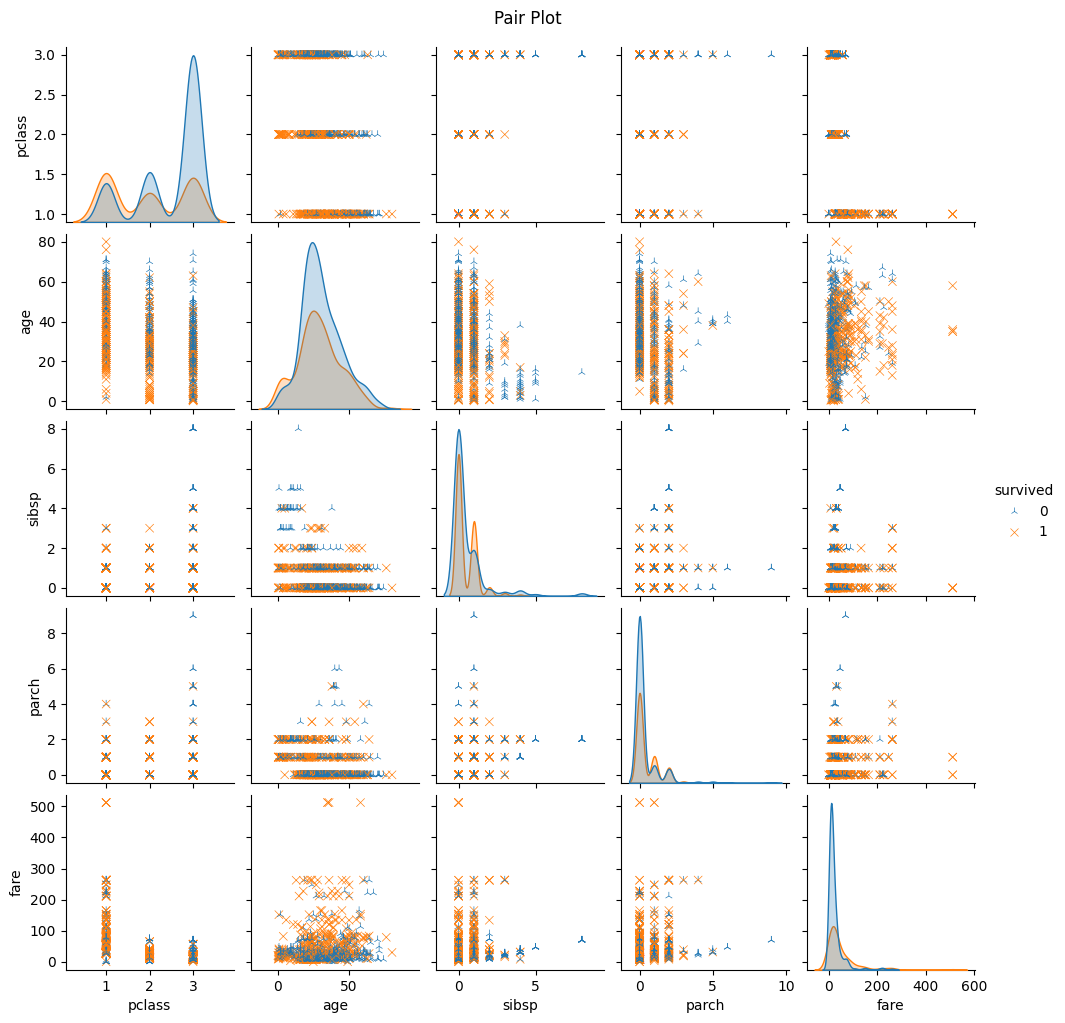

In [ ]:
#@title pp-plot
# Add your code for the Pair Plot below

graph_column = ["pclass", "age", "sibsp", "parch", "fare"]  # Example columns

plt.figure(figsize=(15, 12))
# pairplot = sns.pairplot(data, hue="diagnosis", vars=["mean_radius", "mean_texture", "mean_area", "mean_smoothness"],
#                        markers=["2", "x"], height=2, aspect=1)
pairplot = sns.pairplot(df, hue="survived", vars=graph_column,
                       markers=["2", "x"], height=2, aspect=1)
pairplot.fig.suptitle("Pair Plot", y=1.02)  # Adjust title position
#pairplot.add_legend(title="Survived", labels=["Benign", "Malignant"])
plt.show()


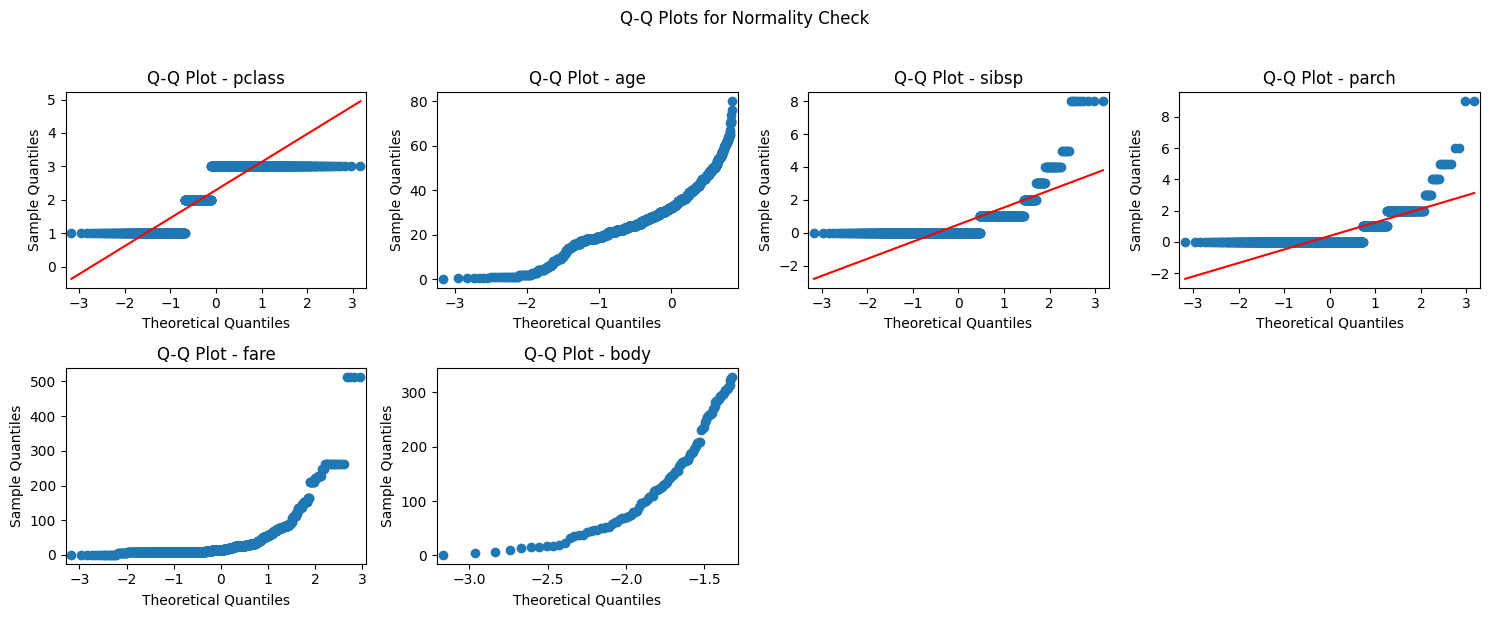

In [ ]:
# Q-Q Plot Function for a DataFrame
def generate_QQ_plots(dataframe):
    # 'dataframe' is our input DataFrame containing the features to analyze
    numeric_features = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Set up a grid of Q-Q plots
    total_features = len(numeric_features)
    columns = 4  # Adjust the number of columns based on preference
    rows = -(-total_features // columns)

    # Create subplots for Q-Q plots
    fig, axes = plt.subplots(rows, columns, figsize=(15, 3 * rows))
    fig.suptitle("Q-Q Plots for Normality Check", y=1.02)

    # Flatten the axes array in case of a single row of plots
    axes = axes.flatten()

    # Generate Q-Q plots for each numeric feature
    for i, feature in enumerate(numeric_features):
        ax = axes[i]
        sm.qqplot(dataframe[feature], line='s', ax=ax)
        ax.set_title(f"Q-Q Plot - {feature}")

    # Remove empty subplots if there are fewer features than subplots
    for i in range(total_features, len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout for proper spacing
    plt.tight_layout()
    plt.show()

generate_QQ_plots(df)  # Replace 'dataframe' with 'df'


### 4 - Data Preprocessing

In [ ]:
#@title 4A - Delete unhelpful features

df_lohi.drop(columns=['name', 'fare','home.dest'], inplace=True)
df_lohi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   sex       1309 non-null   int64   
 2   age       1046 non-null   float64 
 3   sibsp     1309 non-null   float64 
 4   parch     1309 non-null   float64 
 5   ticket    1309 non-null   object  
 6   cabin     295 non-null    object  
 7   embarked  1309 non-null   int64   
 8   boat      486 non-null    object  
 9   body      121 non-null    float64 
 10  survived  1309 non-null   category
dtypes: category(1), float64(5), int64(2), object(3)
memory usage: 103.8+ KB


In [ ]:
#@title 4B - Handle missing values

if df_lohi.isnull().values.any():
    df_lohi.dropna(inplace=True)

# Check for duplicate records and drop duplicates
if df_lohi.duplicated().any():
    df_lohi.drop_duplicates(inplace=True)

median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

df_lohi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    0 non-null      float64 
 1   sex       0 non-null      int64   
 2   age       0 non-null      float64 
 3   sibsp     0 non-null      float64 
 4   parch     0 non-null      float64 
 5   ticket    0 non-null      object  
 6   cabin     0 non-null      object  
 7   embarked  0 non-null      int64   
 8   boat      0 non-null      object  
 9   body      0 non-null      float64 
 10  survived  0 non-null      category
dtypes: category(1), float64(5), int64(2), object(3)
memory usage: 124.0+ bytes


#### Regarding Imputation

The most successful way to handle missing values, including age in the Titanic dataset, depends on various factors, including the characteristics of the data and the goals of the analysis. Here are some common approaches that have been used:

1. **Mean/Median Imputation:** Replace missing values with the mean or median of the available values. Median imputation is less sensitive to outliers and skewed distributions than mean imputation.

   ```python
   median_age = df['age'].median()
   df['age'].fillna(median_age, inplace=True)
   ```

2. **Machine Learning-based Imputation:** Use advanced imputation techniques, such as regression models or machine learning algorithms, to predict missing values based on other features. This approach takes into account relationships between variables.

3. **Group-wise Imputation:** Impute missing values based on specific groups or categories in the data. For example, impute ages based on the median age within different passenger classes or embarkation ports.

4. **Random Imputation:** Generate random values based on the distribution of the available data. This method introduces some variability and can be suitable when the distribution is not strongly skewed.

5. **Multiple Imputation:** Generate multiple imputations and analyze the data multiple times to account for uncertainty in the imputed values. This is particularly useful in statistical analyses.

It's important to note that there is no one-size-fits-all solution, and the choice of method depends on the specific characteristics of the data and the goals of the analysis. Additionally, always be aware of potential biases introduced by imputation and consider validating the chosen method.

In practice, the choice of imputation method may depend on the nature of the dataset and the analysis goals. Researchers and analysts often assess the impact of different imputation strategies on their specific analyses and choose the method that provides the most reasonable and unbiased results for their particular context.

### 5. Feature Engineering

In [ ]:
#@title 5A - Create at least one engineered feature

# Define age group bins and labels
age_bins = [0, 18, 30, 50, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']


df_lohi['FamilySize'] = df_lohi['sibsp'] + df_lohi['parch'] # adding family size to know the numbers of the family
df_lohi['AgeGroup'] = pd.cut(df_lohi['age'], bins=age_bins, labels=age_labels) # Defining their age groups in order to classify them
# Gender types
df_lohi['Sex_male'] = (df_lohi['sex'] == 'male').astype(int)
df_lohi['Sex_female'] = (df_lohi['sex'] == 'female').astype(int)

df_lohi.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pclass      0 non-null      float64 
 1   sex         0 non-null      int64   
 2   age         0 non-null      float64 
 3   sibsp       0 non-null      float64 
 4   parch       0 non-null      float64 
 5   ticket      0 non-null      object  
 6   cabin       0 non-null      object  
 7   embarked    0 non-null      int64   
 8   boat        0 non-null      object  
 9   body        0 non-null      float64 
 10  survived    0 non-null      category
 11  FamilySize  0 non-null      float64 
 12  AgeGroup    0 non-null      category
 13  Sex_male    0 non-null      int64   
 14  Sex_female  0 non-null      int64   
dtypes: category(2), float64(6), int64(4), object(3)
memory usage: 328.0+ bytes


### 5B


FamilySize: This feature represents the total number of family members onboard by summing the number of siblings/spouses and parents/children. It helps analyze whether the size of a passenger's family influenced their likelihood of survival.

AgeGroup: This feature categorizes passengers into different age groups such as Child, Young Adult, and Senior, providing insights into how survival rates varied across different age ranges.

Sex_male and Sex_female: These features encode gender into separate variables for male and female, allowing us to assess the impact of gender on survival rates.

### 6. Data Visualization of Survival by Feature - 6A-6C

<ipython-input-114-256327be990c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rates = df_cleaned.groupby('AgeGroup')['survived'].mean()


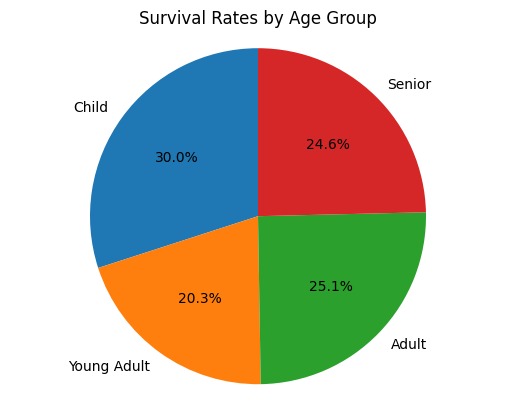

In [ ]:
#@title ii. Pie chart - Survival rates by age
# Calculate survival rates for each age group
age_survival_rates = df_lohi.groupby('AgeGroup')['survived'].mean()

# Create the pie chart
plt.pie(age_survival_rates, labels=age_survival_rates.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival Rates by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<ipython-input-126-c3a06db8b782>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette=['skyblue', 'salmon'])


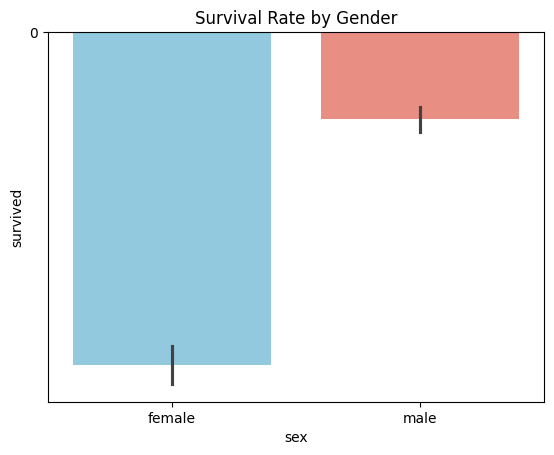

In [ ]:
#@title i. Bar Chart - Survival rate by gender

sns.barplot(x='sex', y='survived', data=df, palette=['skyblue', 'salmon'])
plt.title("Survival Rate by Gender")

# Calculate survival rates for each gender
# Convert 'survived' column to numeric type (assuming it contains 0 and 1)
df_lohi['survived'] = df_lohi['survived'].astype(int)

female_survival_rate = df_lohi[df_lohi['Sex_female'] == 1]['survived'].mean()
male_survival_rate = df_lohi[df_lohi['Sex_female'] == 0]['survived'].mean()

plt.show()

<ipython-input-92-b5d9591110e7>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_rates = df.groupby('FareGroup')['survived'].mean()
<ipython-input-92-b5d9591110e7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fare_survival_rates.index, y=fare_survival_rates.values, palette="viridis", ax=ax1)


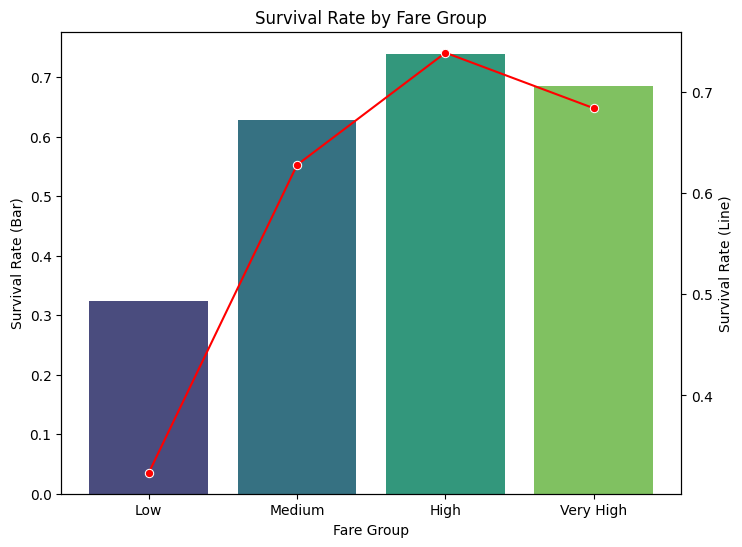

In [ ]:
#@title iii. Bar Chart/Line plot - Survival rate by fare group
# 1. Handle non-numeric fares and bin them
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')
df['fare'] = df['fare'].astype(float)
df.dropna(subset=['fare'], inplace=True)
df['FareGroup'] = pd.cut(df['fare'], bins=[0, 50, 100, 200, float('inf')],
                          labels=['Low', 'Medium', 'High', 'Very High'])

# 2. Calculate survival rates per fare group
# Convert 'survived' column to numeric type
df['survived'] = pd.to_numeric(df['survived'], errors='coerce')

fare_survival_rates = df.groupby('FareGroup')['survived'].mean()

# 3. Create a figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# 4. Bar chart on the first axis
sns.barplot(x=fare_survival_rates.index, y=fare_survival_rates.values, palette="viridis", ax=ax1)
ax1.set_xlabel('Fare Group')
ax1.set_ylabel('Survival Rate (Bar)')

# 5. Create a second y-axis
ax2 = ax1.twinx()

# 6. Line plot on the second axis
sns.lineplot(x=fare_survival_rates.index, y=fare_survival_rates.values, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Survival Rate (Line)')

# 7. Overall title
plt.title('Survival Rate by Fare Group')
plt.show()



### 7. Report

Write your report in this space.


7a - Interpreting Visualizations
Bar Chart (Survival Rate by Gender):
This chart likely indicates a much higher survival rate for females compared to males, suggesting that gender had a significant impact on survival. The disparity could be attributed to evacuation protocols that prioritized women and children, as well as prevailing social norms during the time.

Pie Chart (Survival Rates by Age Group):
This chart illustrates how survival rates are distributed across various age groups. It may show that young adults and children had a higher likelihood of survival, while adults and the elderly experienced lower survival rates. This highlights the increased vulnerability of older passengers.

Line Plot (Survival Rates by Fare):
This plot likely suggests a positive correlation between the fare paid and survival rates. Passengers who paid higher fares might have had access to better accommodations or higher-priority evacuation opportunities, leading to a greater likelihood of survival.

Heatmap (Survival Rates by Age Group and Gender):
This heatmap provides a detailed view of survival rates across different combinations of age and gender. Patterns might emerge, such as significantly lower survival rates for elderly males or higher survival rates for adult females, giving insight into how these two factors interacted.

7b - Conclusions and Insights
Based on the visualizations and analysis of the Titanic dataset, several conclusions can be drawn:

Gender as a key factor: Females had a much higher survival rate compared to males, reinforcing the idea that evacuation prioritized women and children.

Age-related survival trends: Children had a better chance of survival, while adults and elderly passengers faced greater risks, indicating that age played a notable role in survival chances.

Fare and survival linkage: Passengers who paid higher fares generally had better survival rates. This suggests that socioeconomic factors, such as cabin class and access to lifeboats, were critical during the evacuation process.